# ９章 次元削減
## 環境構築

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 問題3.8

In [2]:
#データの収集
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)

60000 10000


In [3]:
#ランダムフォレストを次元削減なしで使う
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [4]:
#時間計測用のアルゴリズム
import time
t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [6]:
print("Training without PCA took {:.2f}".format(t1 - t0))

Training without PCA took 177.15


In [7]:
#性能をテストセットで評価
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
score_without_PCA = accuracy_score(y_pred, y_test)

In [8]:
print("Accuracy without PCA", score_without_PCA)

Accuracy without PCA 0.9674


In [9]:
#因子寄与率0.95で次元削減をする
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [10]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [11]:
print("Training with PCA took {:.2f}".format(t1 - t0))

Training with PCA took 262.82


In [13]:
#性能をテストセットで評価
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)
score_with_PCA = accuracy_score(y_pred, y_test)

In [14]:
print("Accuracy with PCA", score_with_PCA)

Accuracy with PCA 0.9487


In [15]:
#模範コードよりPCAにより早くなるケース
#ソフトマックス
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/Users/abetoshinin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/abetoshinin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print("Training without PCA took {:.2f}".format(t1 - t0))

Training without PCA took 95.79


In [17]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9189

In [18]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()


/Users/abetoshinin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/abetoshinin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print("Training with PCA took {:.2f}".format(t1 - t0))

Training with PCA took 24.46


In [20]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_pred, y_test)

0.9141

# 問題3.10

In [21]:
#s-TNEを使うが、データが重いので10000個で次元削減する
np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]
X = mnist["data"][idx]
y = mnist["target"][idx]


In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

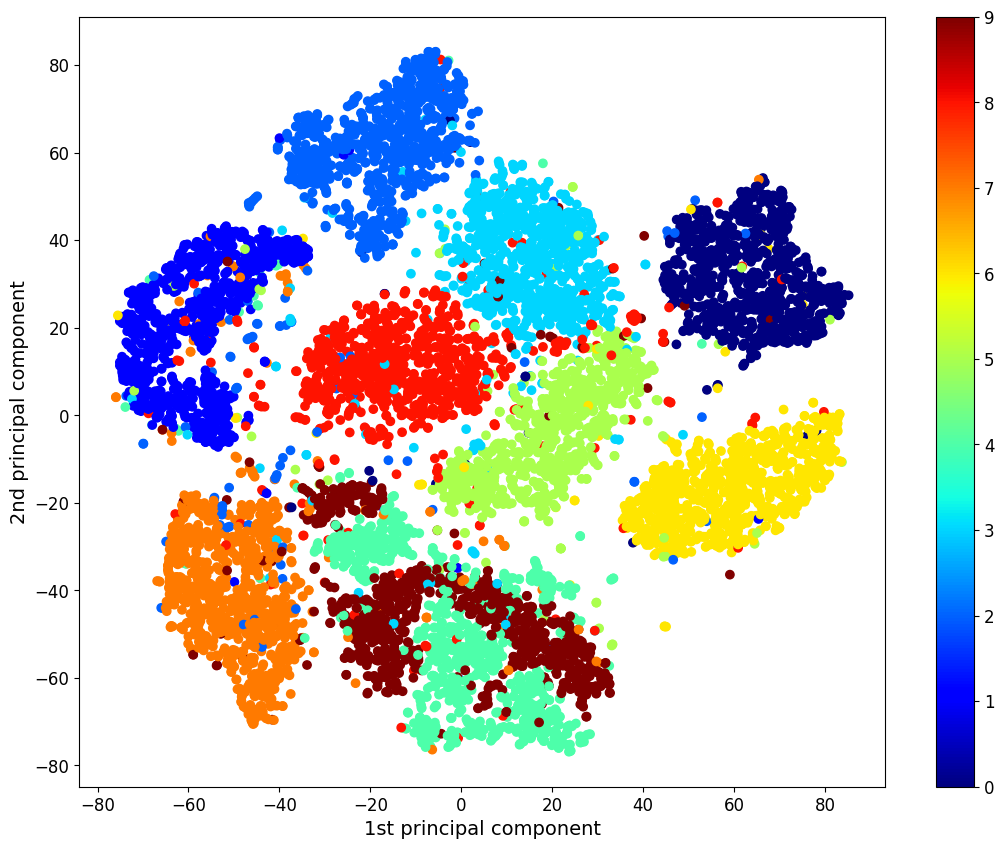

In [26]:
#プロットする
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap="jet")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.colorbar()
plt.show()

/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/2781924621.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


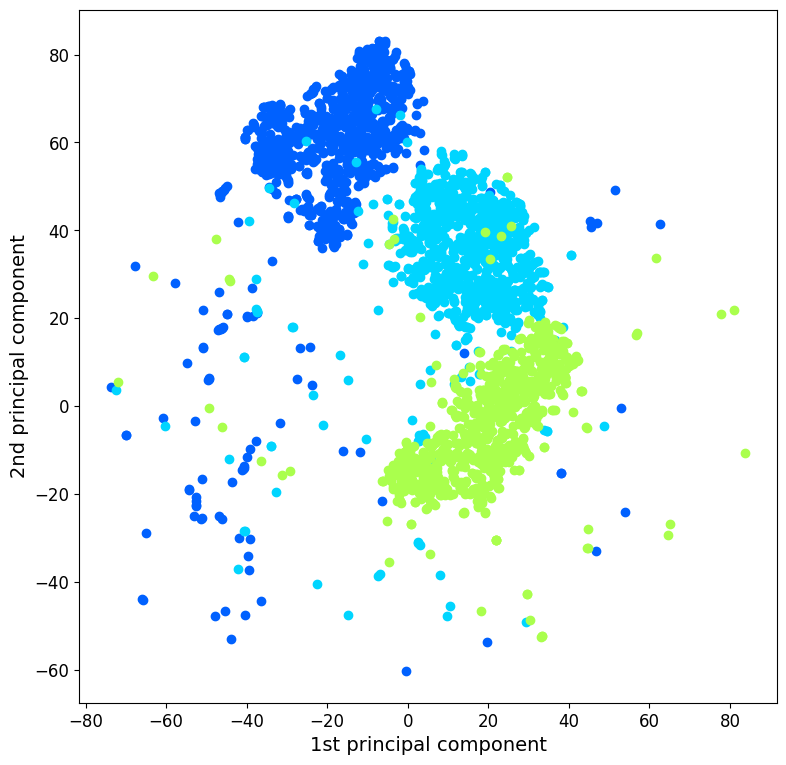

In [27]:
#2,3,5が重なっているのでfix
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit/9)])
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [29]:
idx = (y == 2) | (y == 3) |(y == 5)
X_subset = X[idx]
y_subset = y[idx]
tsne_subset  = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/1575385921.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


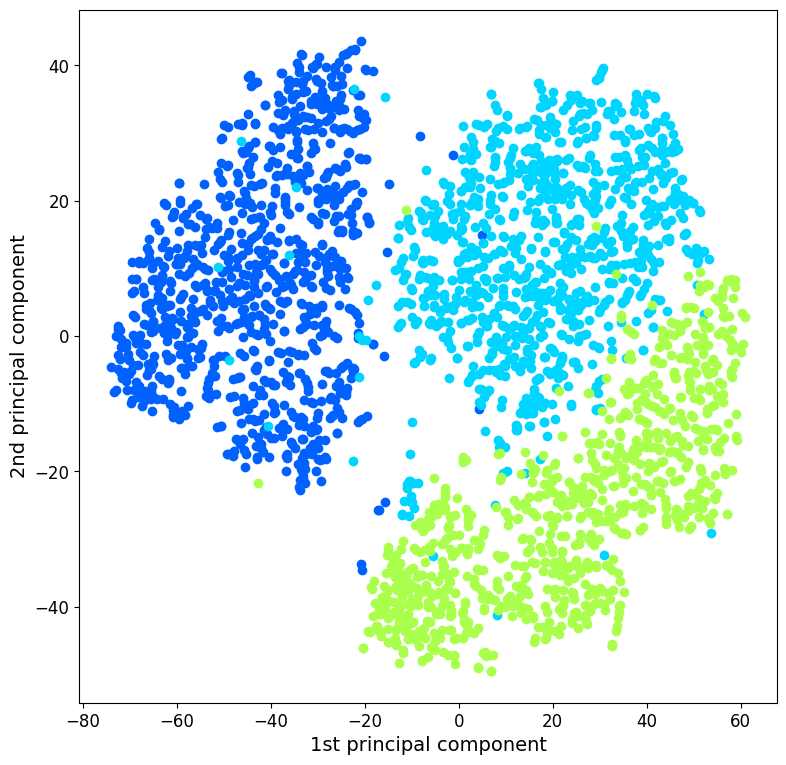

In [32]:
#2,3,5が重なっているのでfix
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit/9)])
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [39]:
#数字をプロットする関数
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    #スケールを0から1に調整
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])

    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit/9)])
    plt.xlabel("1st principal component")
    plt.ylabel("2nd principal component")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])), color=cmap(y[index]/9), fontdict={"weight": "bold", "size":16})
            else:
                image = images[index].reshape(28,28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4189568187.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


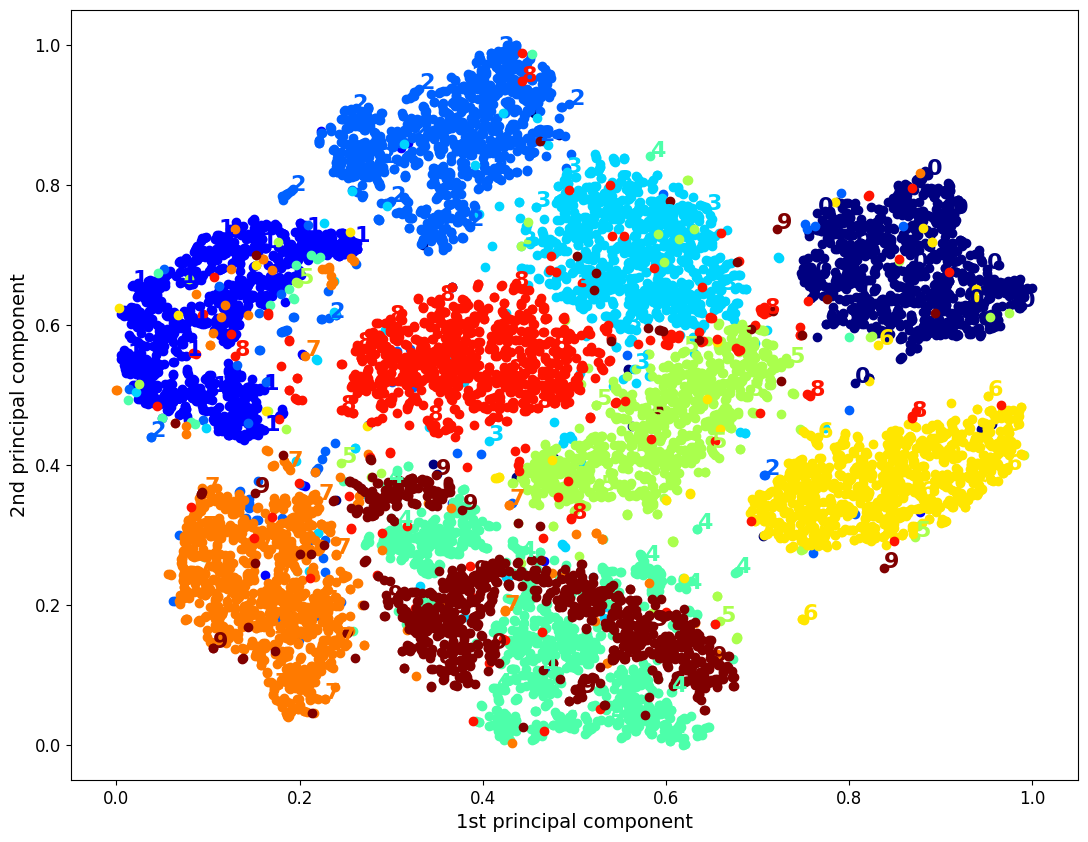

In [35]:
plot_digits(X_reduced, y)

/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4248549173.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


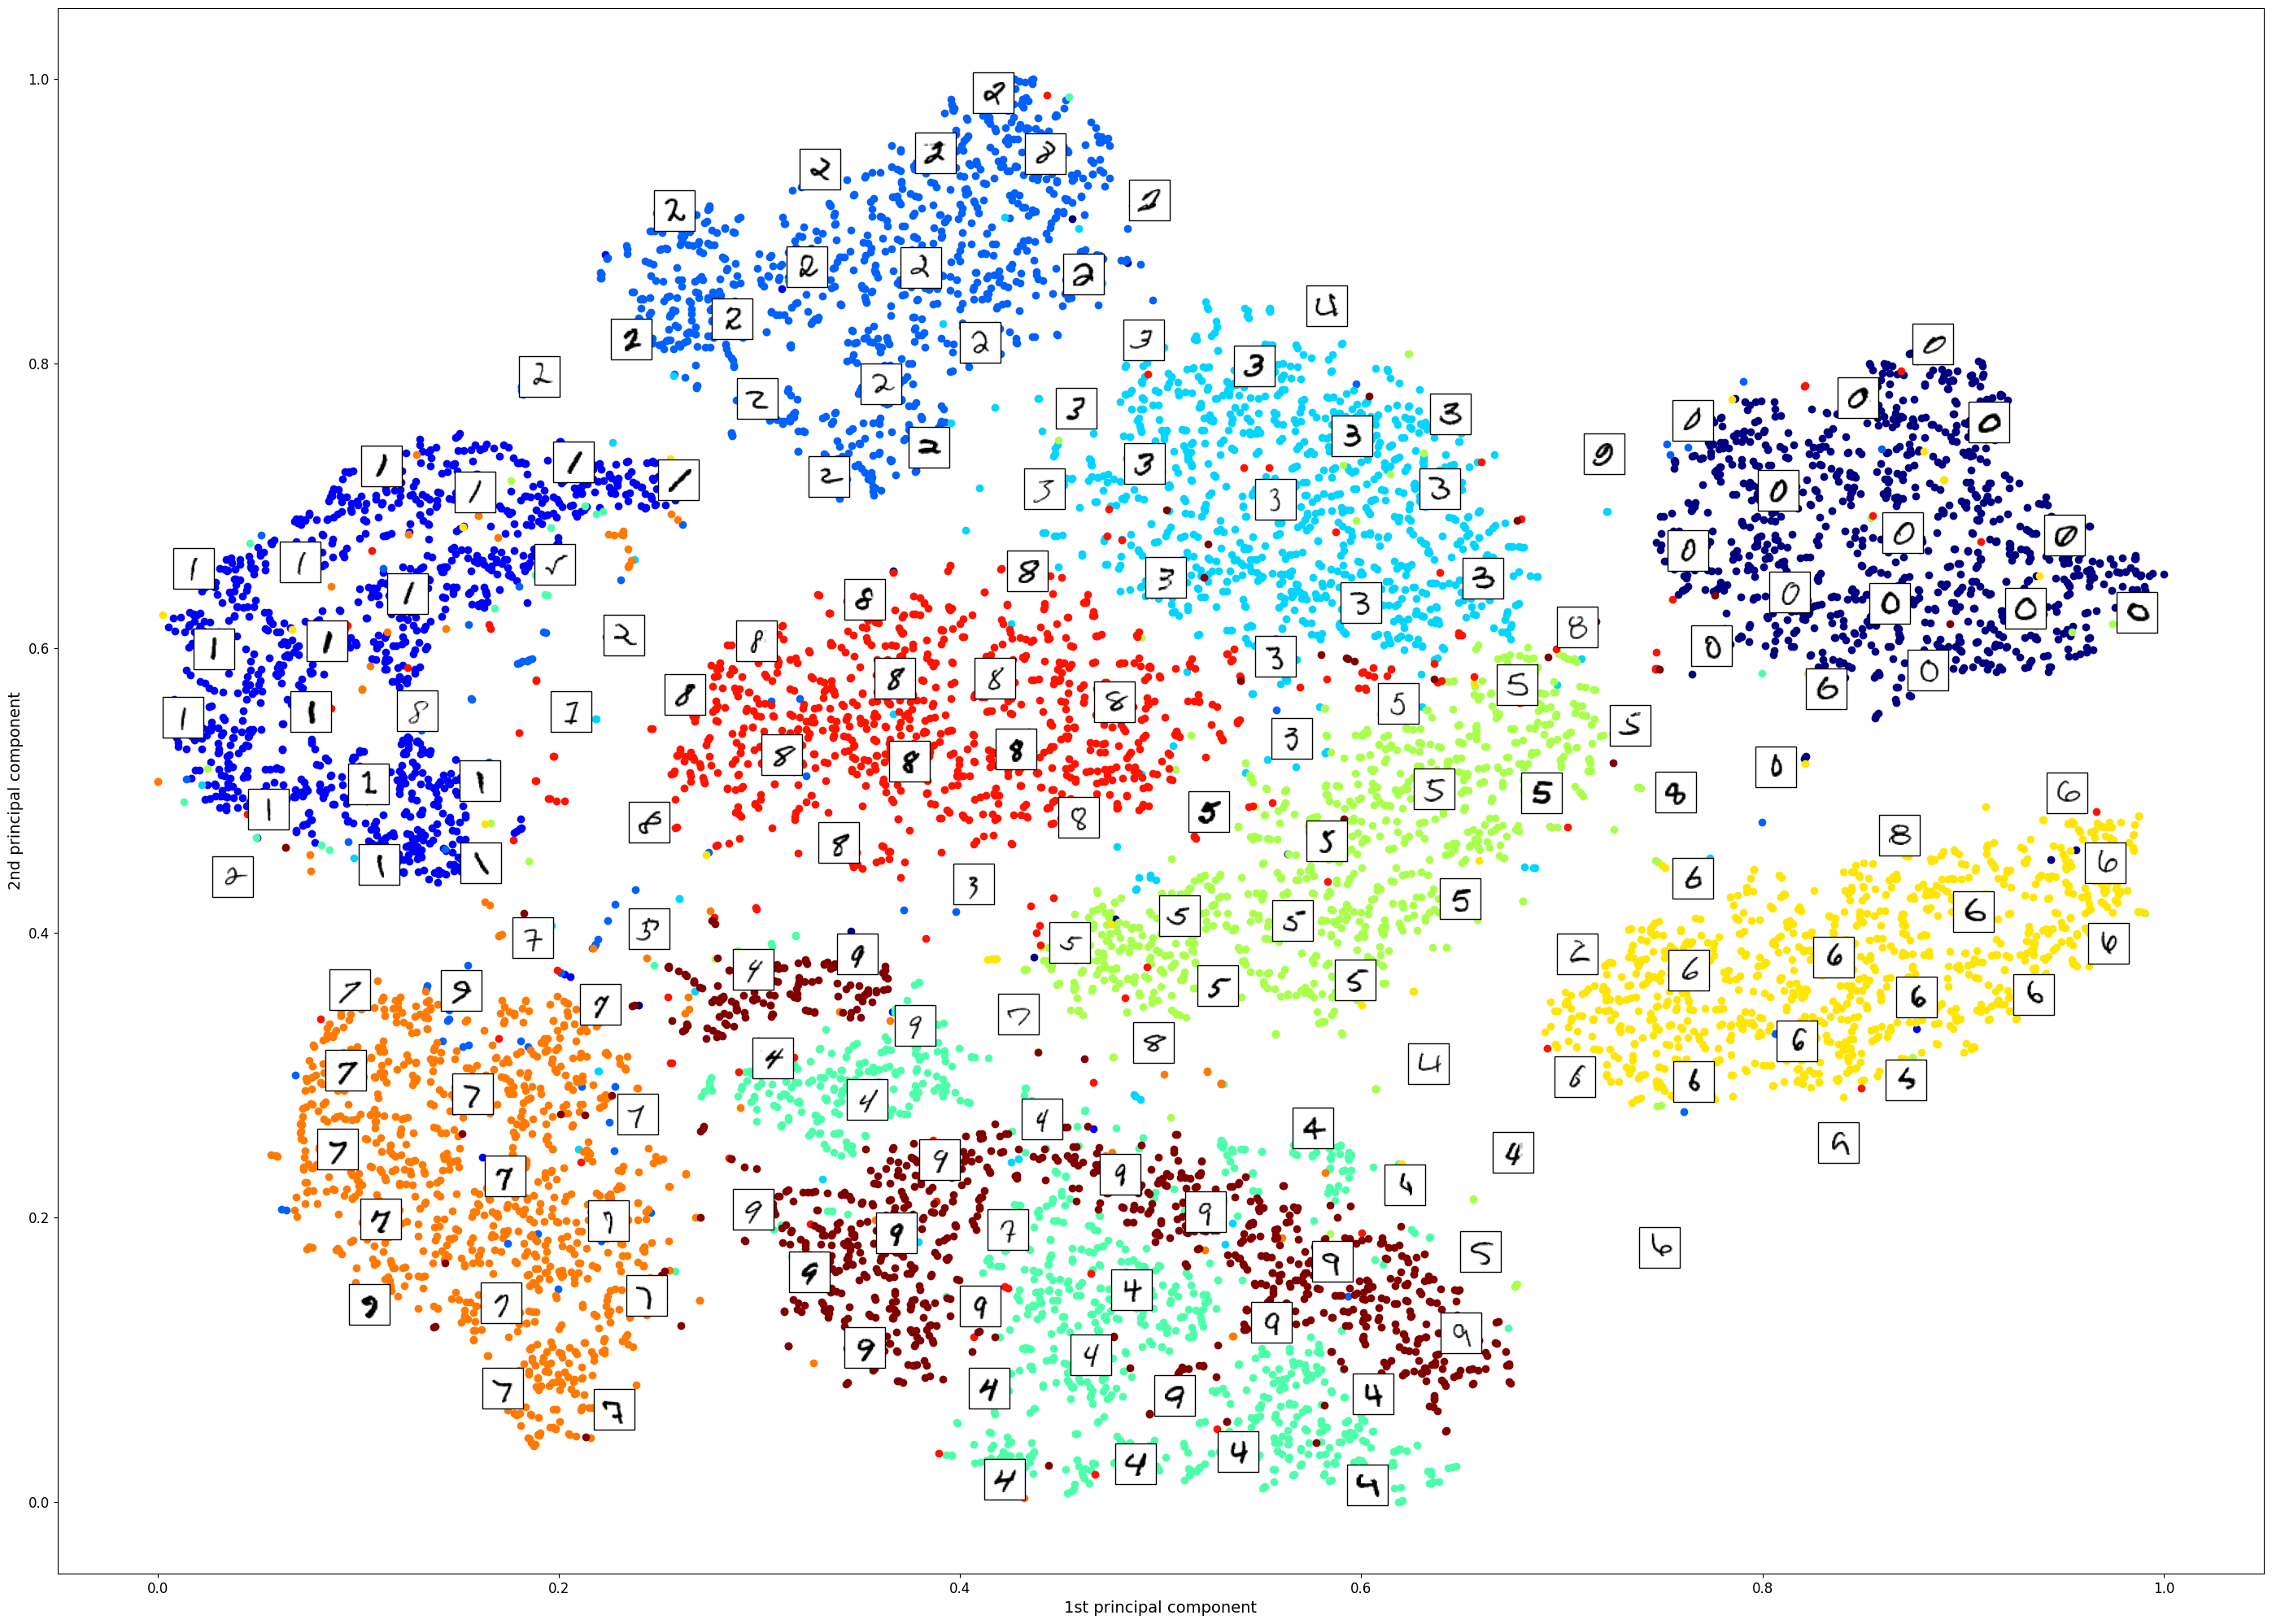

In [40]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4248549173.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


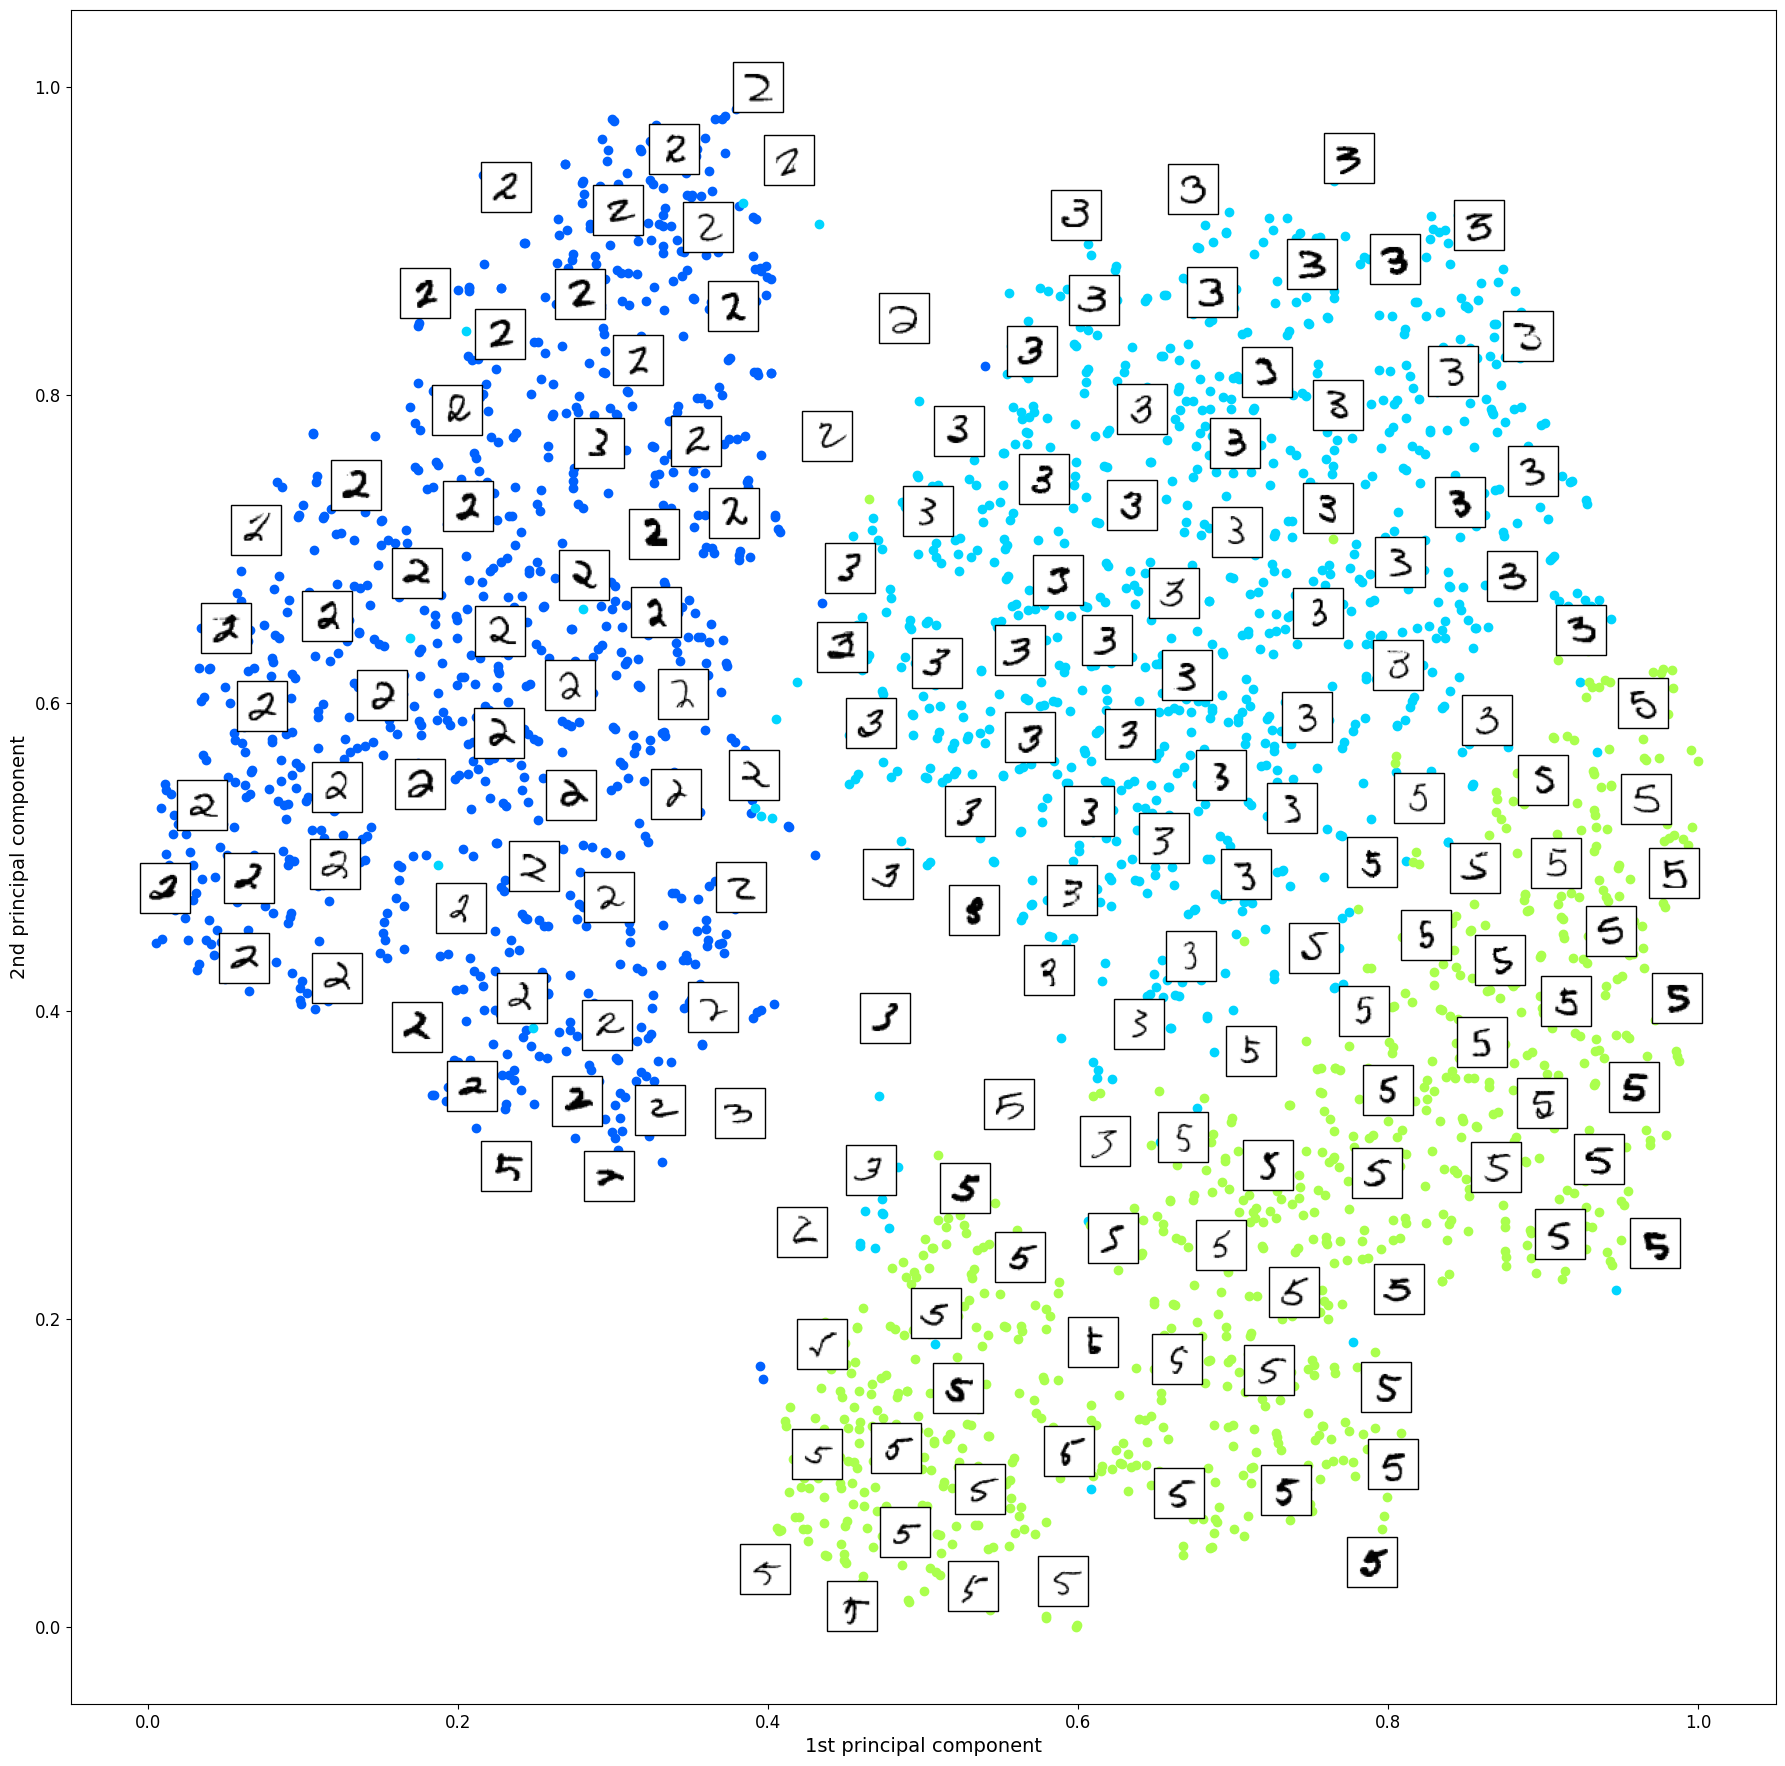

In [42]:
#2, 3, 5のもの
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22,22))

PCA took 2.2s


/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4248549173.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


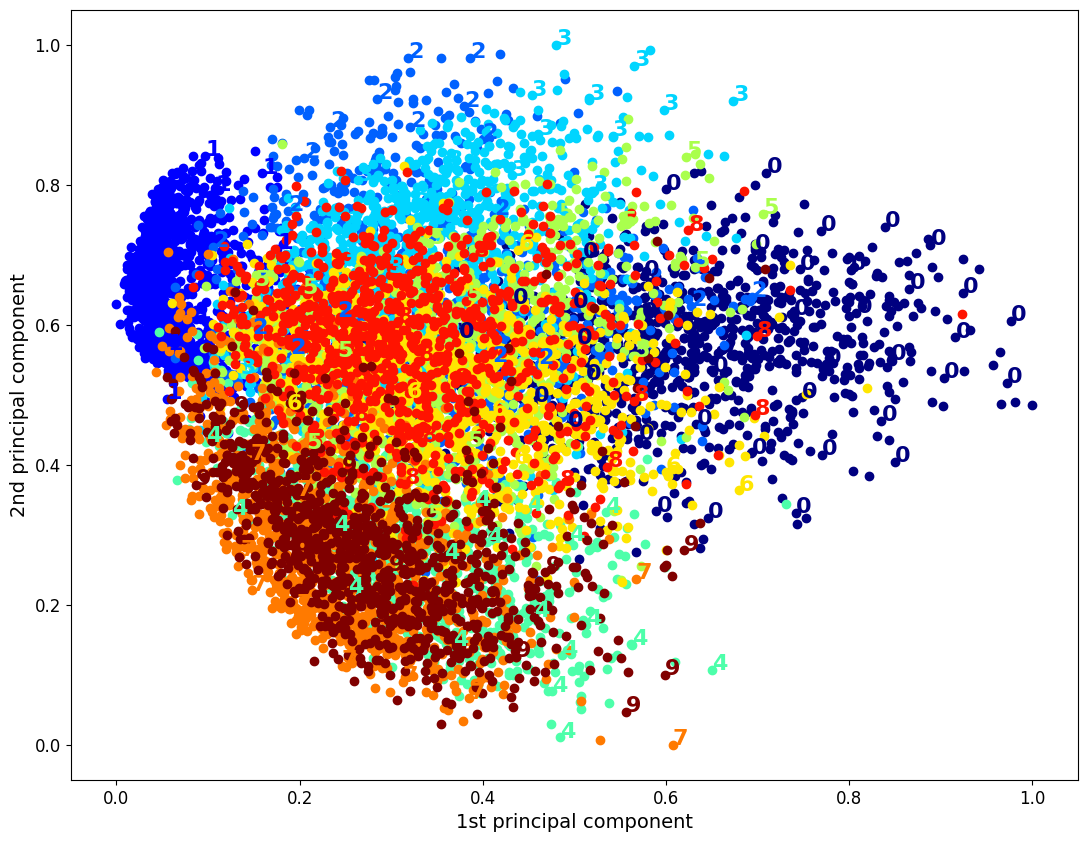

In [43]:
#様々な次元削減手法
from sklearn.decomposition import PCA

t0 = time.time()
pca = PCA(n_components=2, random_state=42)
X_pca_reduced = pca.fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

LLE took 234.4s


/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4248549173.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


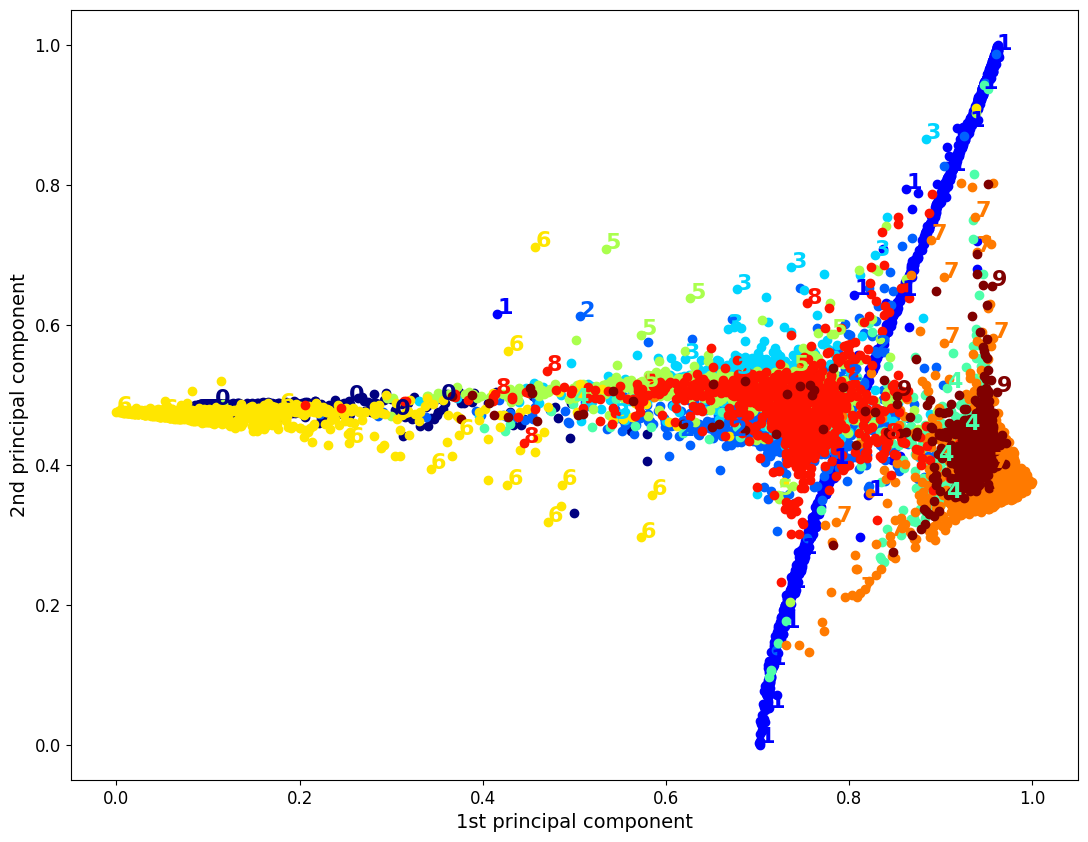

In [44]:
from sklearn.manifold import LocallyLinearEmbedding
t0 = time.time()
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle_reduced = lle.fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

PCA and LLE took 109.7s


/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4248549173.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


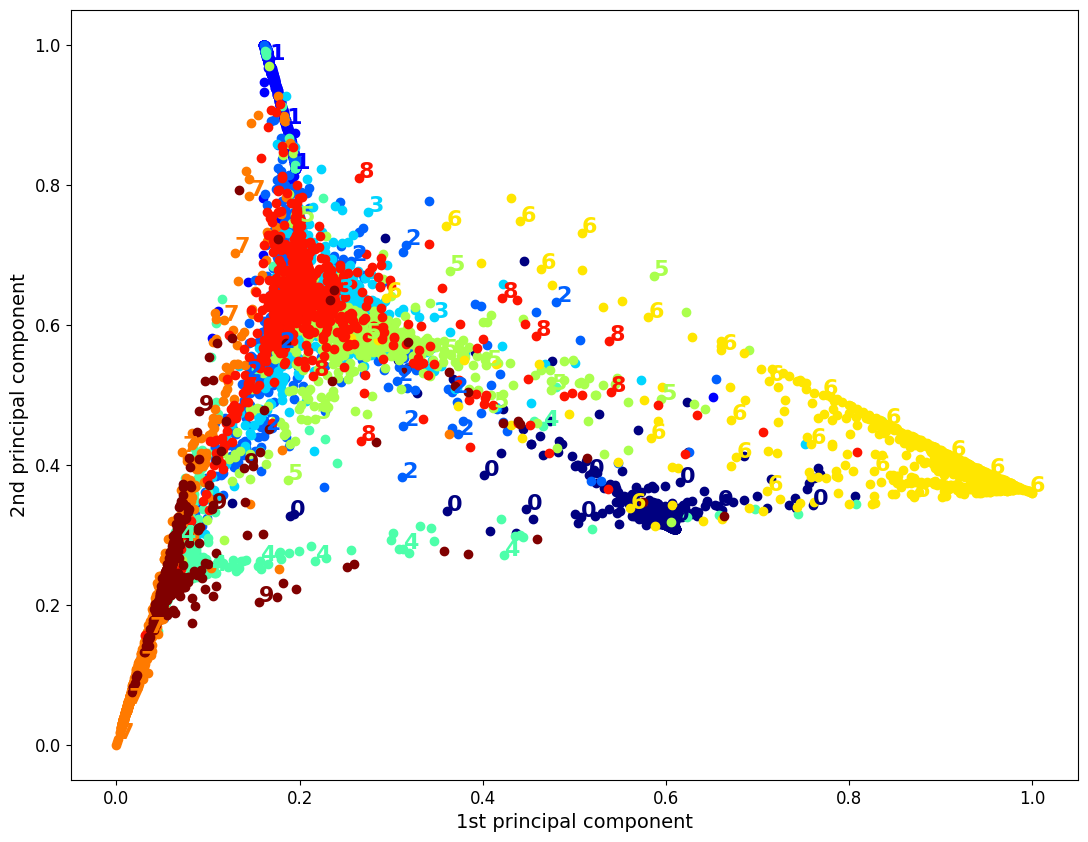

In [45]:
from sklearn.pipeline import Pipeline
pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA and LLE took {:.1f}s".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

MDS took 93.1s(only 1000 images)


/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4248549173.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


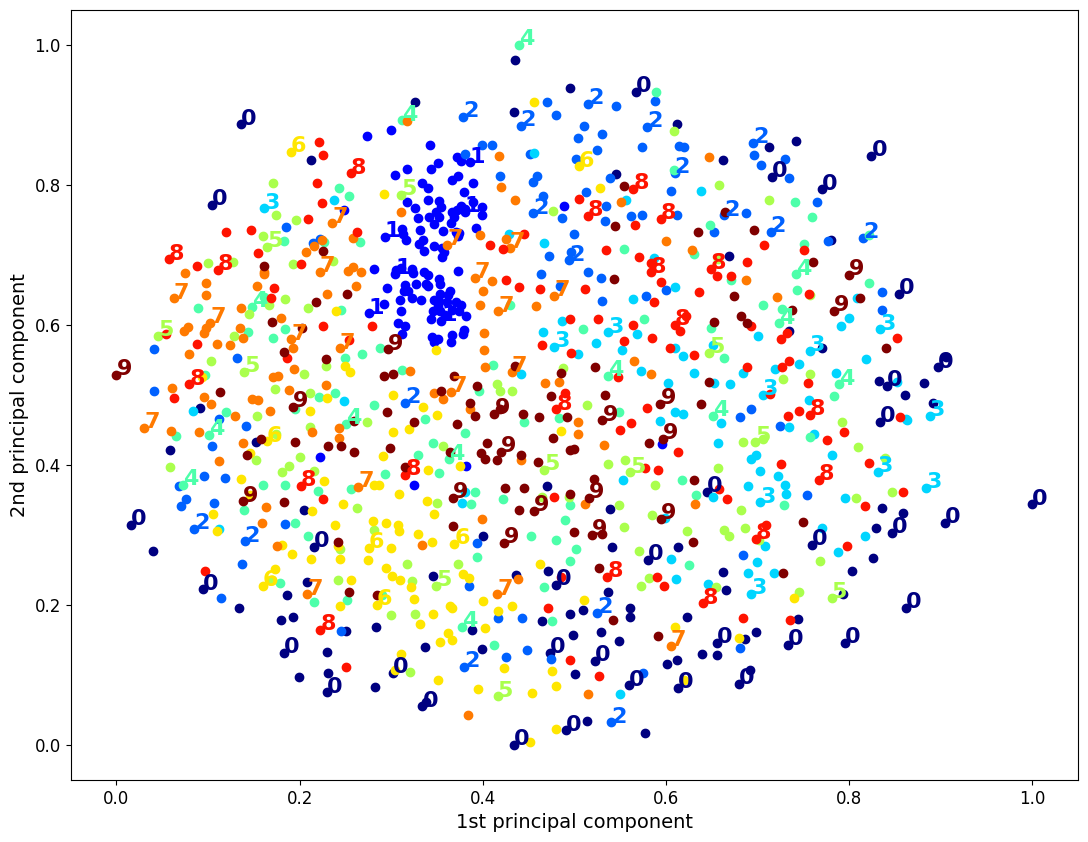

In [47]:
#MDSはさらに遅い
from sklearn.manifold import MDS
m = 1000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s(only 1000 images)".format(t1-t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

PCA and MDS took 56.2s(only 1000 images)


/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4248549173.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


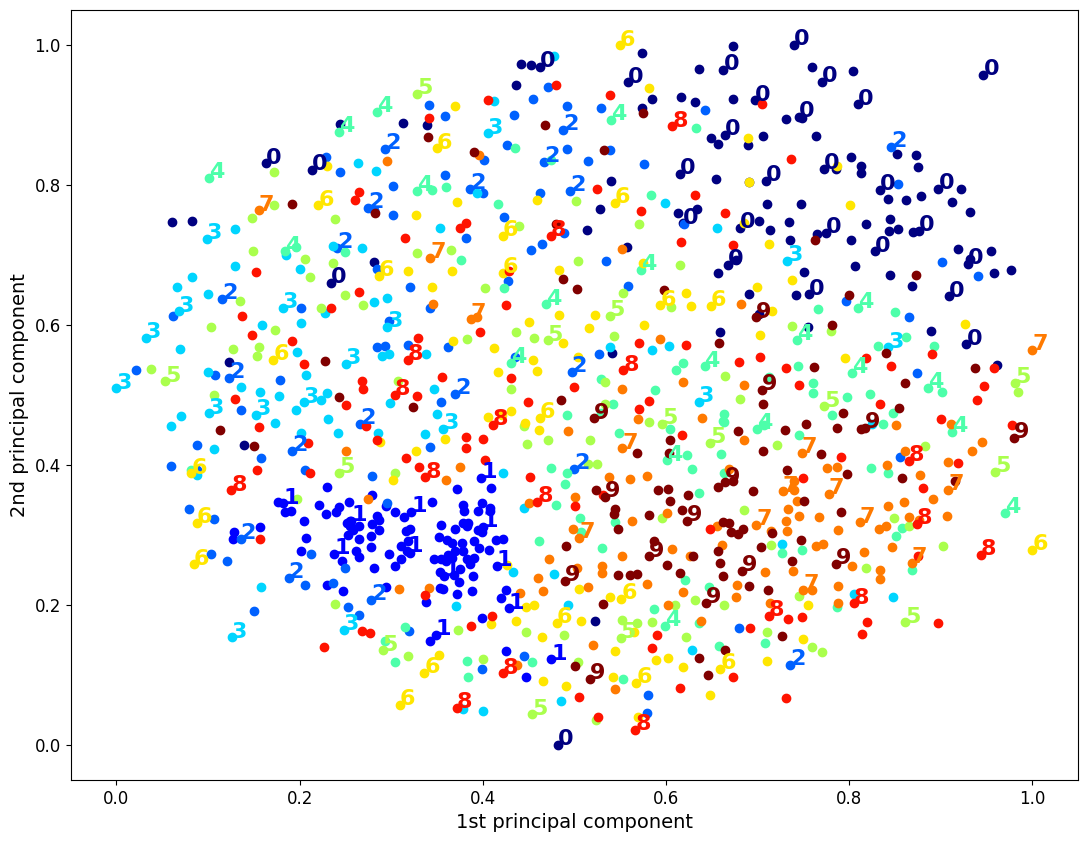

In [50]:
pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:m])
t1 = time.time()
print("PCA and MDS took {:.1f}s(only 1000 images)".format(t1-t0))
plot_digits(X_pca_mds_reduced, y[:m])
plt.show()

LDA took 8.9s


/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4248549173.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


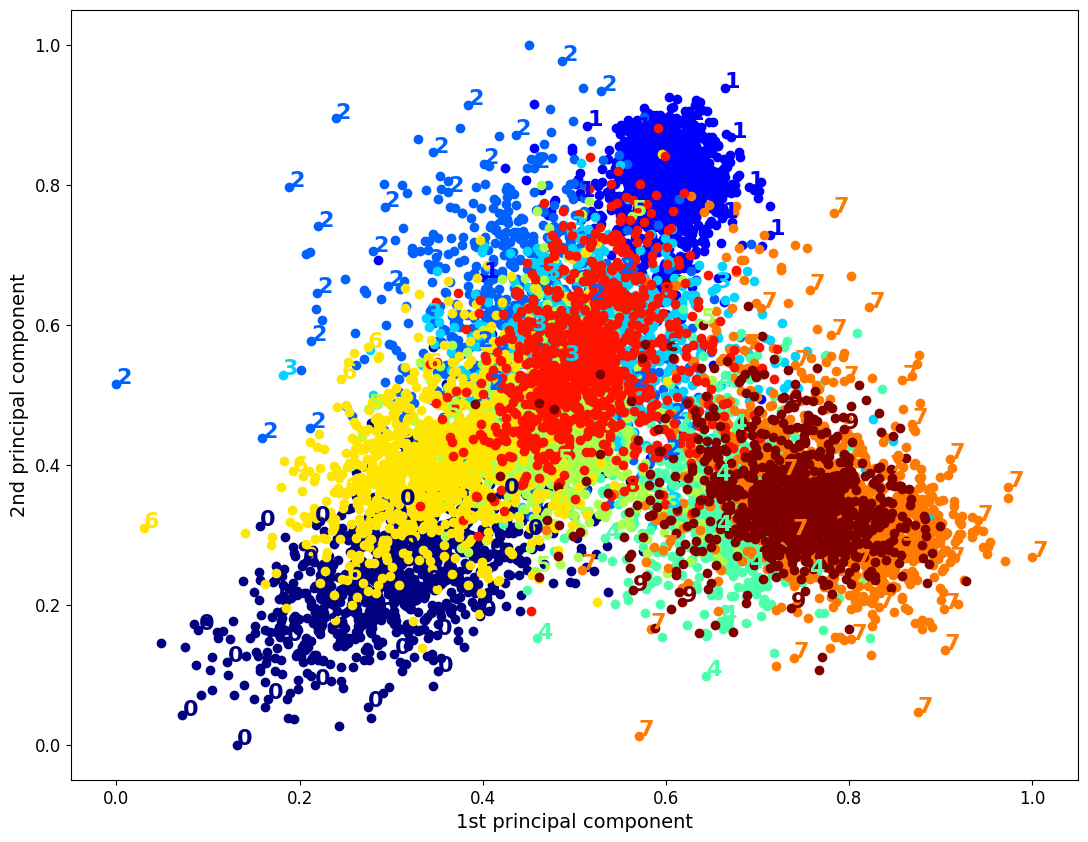

In [53]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s".format(t1-t0))
plot_digits(X_lda_reduced, y)
plt.show()

tSNE took 186.4s


/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4248549173.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


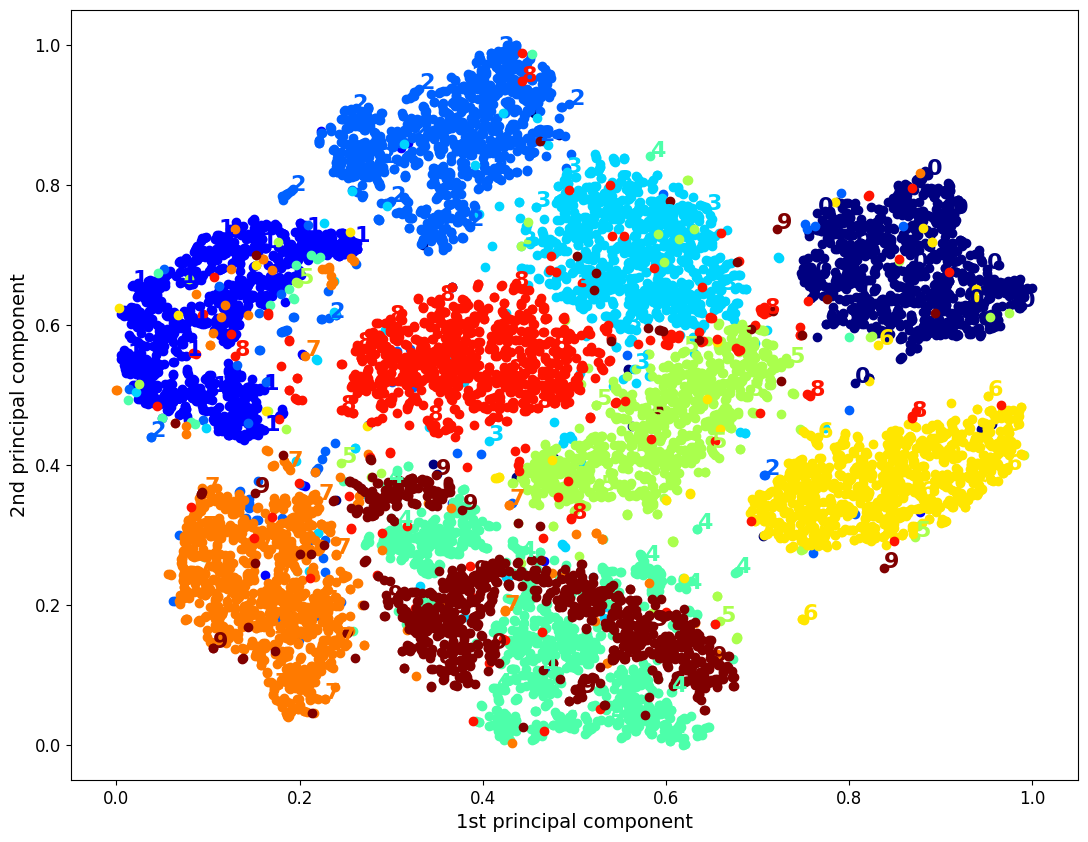

In [54]:
#tSNE
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("tSNE took {:.1f}s".format(t1-t0))
plot_digits(X_tsne_reduced, y)
plt.show()

PCA and tSNE took 154.6s


/var/folders/54/cbcclv0d395g7_srb7cvqqyw0000gn/T/ipykernel_28150/4248549173.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


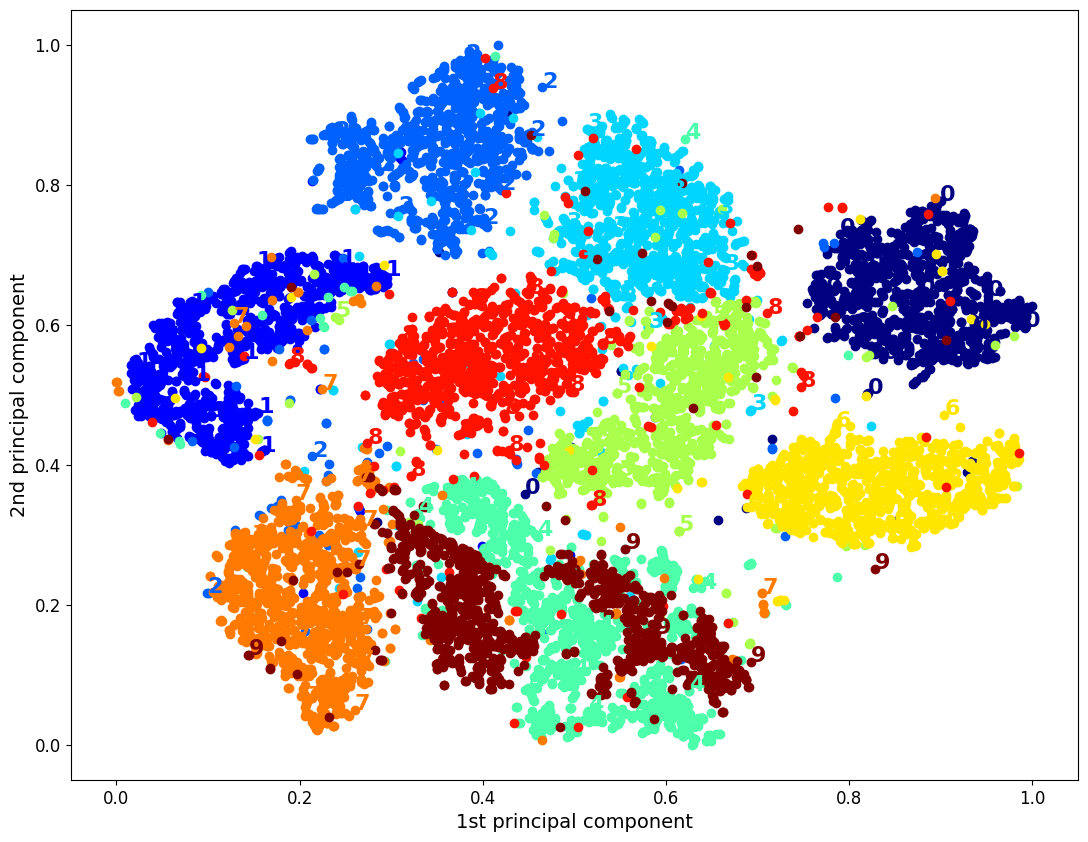

In [55]:
#PCA+tSNE
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA and tSNE took {:.1f}s".format(t1-t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()